<a href="https://colab.research.google.com/github/sbbwoy/ESAA/blob/main/%EC%98%81%ED%99%94%20%EA%B4%80%EA%B0%9D%EC%88%98%20%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 영화 관객 수 데이터를 활용한 데이터 분석
#####감독, 이름, 상영등급, 스태프 수 등의 정보로 영화 관객 수를 예측하는 모델을 만들어 주세요!

###1. 라이브러리 및 데이터

In [ ]:
#그래프 한글 깨짐 방지
'''
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
'''

'\n!sudo apt-get install -y fonts-nanum\n!sudo fc-cache -fv\n!rm ~/.cache/matplotlib -rf\n'

In [ ]:
# 경고처리
import warnings
warnings.filterwarnings(action='ignore')

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager
import lightgbm as lgb
import seaborn as sns

from sklearn.model_selection import train_test_split
%matplotlib inline

## 2. 탐색적 자료분석


* title : 영화의 제목
* distributor : 배급사
* genre : 장르
* release_time : 개봉일
* time : 상영시간(분)
* screening_rat : 상영등급
* director : 감독이름
* dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)
* dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)
* num_staff : 스텝수
* num_actor : 주연배우수
* box_off_num : 관객수

In [102]:
movies = pd.read_csv('/content/movies_train.csv')
movies.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


## 3. 데이터 전처리

In [103]:
# 결측치 처리
movies['dir_prev_bfnum'].fillna(0, inplace=True)
# datetime 형 변환
movies['release_time']=pd.to_datetime(movies['release_time'])

In [ ]:
#배급사별 관객수의 평균이 높은 순
dis_mean = movies.groupby('distributor').mean().sort_values(by='box_off_num', ascending=False) 
dis_mean.reset_index(inplace=True)
dis_mean_best10 = dis_mean.head(10)
dis_mean_best10

,distributor,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,CJ E&M Pictures,115.000000,4.111671e+06,0.500000,335.000000,8.000000,4.122337e+06
1,(주)쇼박스,126.538462,1.370236e+06,1.807692,360.384615,3.923077,3.386656e+06
2,(주)아이필름코퍼레이션,121.000000,7.250000e+01,2.000000,458.000000,3.000000,3.117859e+06
3,쇼박스(주)미디어플렉스,111.500000,5.000000e-01,0.500000,293.000000,2.500000,2.634823e+06
4,영구아트무비,103.000000,7.855474e+06,1.000000,31.000000,5.000000,2.541603e+06
5,CJ E&M 영화부문,111.000000,2.163222e+06,2.000000,112.333333,3.000000,2.505309e+06
6,(주)NEW,112.033333,1.033694e+06,1.366667,277.266667,4.133333,2.184405e+06
7,CJ 엔터테인먼트,111.370370,8.911291e+05,1.481481,313.629630,3.777778,2.162742e+06
8,이십세기폭스코리아(주),117.666667,7.460766e+05,2.000000,194.000000,4.333333,1.637046e+06
9,SK텔레콤(주),111.000000,0.000000e+00,0.000000,410.000000,4.000000,1.383867e+06


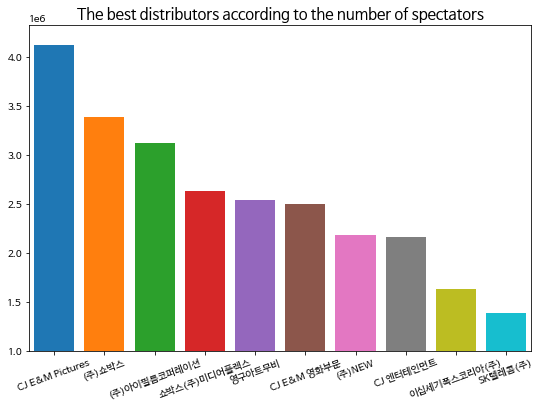

In [54]:
plt.figure(figsize=(9, 6))
plt.rc('font', family='NanumBarunGothic', size=10)
plt.bar(dis_mean['distributor'], dis_mean['box_off_num'], color=['C'+str(i) for i in range(10)])
plt.xticks(dis_mean['distributor'], rotation=20)
plt.title('The best distributors according to the number of spectators', size=15)
plt.xlim(-0.5, 9.5)
plt.ylim(bottom=10**6)
plt.show()

In [ ]:
#감독별 관객수의 평균이 높은 순
director_mean = movies.groupby('director').mean().sort_values(by='box_off_num', ascending=False) 
director_mean.head()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
director,,,,,,
윤제균,126.0,0.000000e+00,0.0,869.0,4.0,14262766.0
최동훈,137.0,3.867085e+06,3.5,545.0,6.5,12845252.0
양우석,127.0,0.000000e+00,0.0,311.0,5.0,11374879.0
봉준호,125.0,0.000000e+00,0.0,67.0,10.0,9350351.0
한재림,139.0,1.242778e+06,2.0,298.0,6.0,9135806.0


In [ ]:
directors = movies.groupby('director')
for director in directors:
    movies['director'] =

In [ ]:
bestGenre = movies.groupby('genre').mean().sort_values(by='box_off_num', ascending=False)   #관객수로 알아보는 선호 장르
bestGenre.head()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
genre,,,,,,
느와르,115.370370,7.749172e+05,1.296296,311.074074,3.592593,2.263695e+06
액션,114.464286,1.061149e+06,1.857143,337.535714,3.607143,2.203974e+06
SF,101.384615,1.238218e+06,1.307692,197.307692,3.692308,1.788346e+06
코미디,105.264151,9.466686e+05,1.094340,209.075472,4.735849,1.193914e+06
드라마,104.651584,3.673737e+05,0.814480,164.484163,3.647059,6.256898e+05


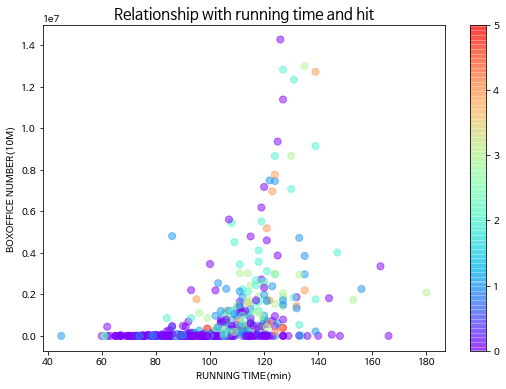

In [36]:
# 러닝타임과 관객수의 관계 산점도 + 전작 수(dir_prev_num) 

plt.figure(figsize=(9))
plt.scatter(movies['time'], movies['box_off_num'], c=movies['dir_prev_num'], cmap='rainbow', alpha=0.5, s=50)
plt.rc('font', family='NanumBarunGothic', size=10)
plt.xlabel('RUNNING TIME(min)')
plt.ylabel('BOXOFFICE NUMBER(10M)')
plt.colorbar()
plt.title('Relationship with running time and hit', size=15)
plt.show()

In [105]:
# title drop
movies = movies.drop('title', axis=1)

## 4. 변수 선택 및 모델 구축

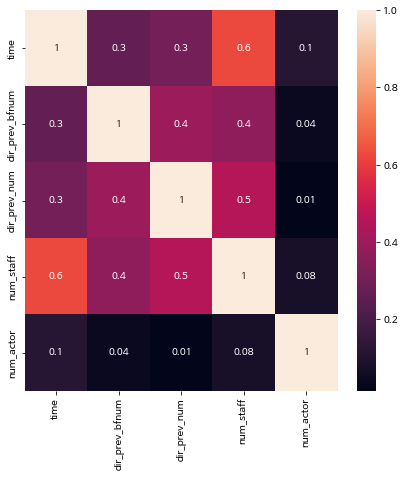

In [116]:
y_target = movies['box_off_num']
X_features = movies.drop('box_off_num', axis=1)

corr = X_features.corr()
plt.figure(figsize=(7, 7))
sns.heatmap(corr, annot=True, fmt='.1g')

보통 0.4 이상일 경우 상관관계가 있다고 판단 

--> num_staff와 dir_prev_num / time이 상관관계가 높다고 판단되므로 하나의 component로 PCA 변환하려 함

In [65]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

cols = ['num_staff', 'dir_prev_num', 'time']
print('대상 속성명: ', cols)

scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features[cols])
pca = PCA(n_components=1)
pca.fit(df_cols_scaled)
print('PCA Component 변동성: ', pca.explained_variance_ratio_)

대상 속성명:  ['num_staff', 'dir_prev_num', 'time']
PCA Component 변동성:  [0.6443002]


## 5. 모델 학습 및 검증

### a. lightGBM (base model)
### b. k-fold lightGBM (k-fold model)
### c. feature engineering (fe)
### d. grid search (hyperparameter tuning)

In [117]:
X_features

,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.00,0,91,2
1,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3
2,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4
3,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6
4,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2
...,...,...,...,...,...,...,...,...,...,...
595,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.00,1,510,7
596,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.00,1,286,6
597,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,0.00,0,123,4
598,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,0.00,0,431,4


In [123]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(n_estimators=300, random_state=156)
scores = cross_val_score(rcf, X_features, y_target, scoring='accuracy', cv=2)
print('원본 데이터 교차 검증 개별 정확도:', scores)
print('원본 데이터 평균 정확도:', np.mean(scores))

원본 데이터 교차 검증 개별 정확도: [nan nan]
원본 데이터 평균 정확도: nan
